## 목표
- 주어진 피처들을 조합하여 전용면적비례차량수를 가장 잘 예측하는 모델을 만들고 싶다. 
- 수치형 피처와 범주형 피처를 구분하여 해당 피처에 따라 전용면적비례차량수가 차이를 보인다면 전용면적비례차량수를 예측하는데 사용하기 좋은 피처가 될 것이다. 
- 수치형 피처의 경우 선형관계를 기준으로 전용면적비례차량수와의 연관성을 판단하였는데, 선형 알고리즘이 아닌 모델에서도 선형관계가 작은 피처가 좋은 피처로 작동할 수 있다. 이는 모델 평가에서 다양하게 실험해보도록 한다.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
rc('font',family='AppleGothic')
rcParams['axes.unicode_minus']= False

In [2]:
path = './data_전용면적별/'

train = pd.read_csv(path + 'train_new.csv')
test = pd.read_csv(path + 'test_new.csv')

train.shape, test.shape

((1420, 71), (541, 69))

## 수치형 피처
- 수치형 피처 : '총세대수','전용면적','공가수','임대보증금','임대료','버스정류장','단지내주차면수','전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율'

### 결과
- '임대보증금', '임대료', '단지내주차면수','전용면적별세대수','면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율' (+'공가수')가 의미있는 피처가 될 수 있을 것 같다.

             전용면적_비례_차량수
총세대수            0.054944
전용면적            0.043882
공가수             0.148022
임대보증금           0.161507
임대료             0.329555
버스정류장           0.085359
단지내주차면수         0.502104
전용면적별세대수        0.716855
전용면적_비례_차량수     1.000000


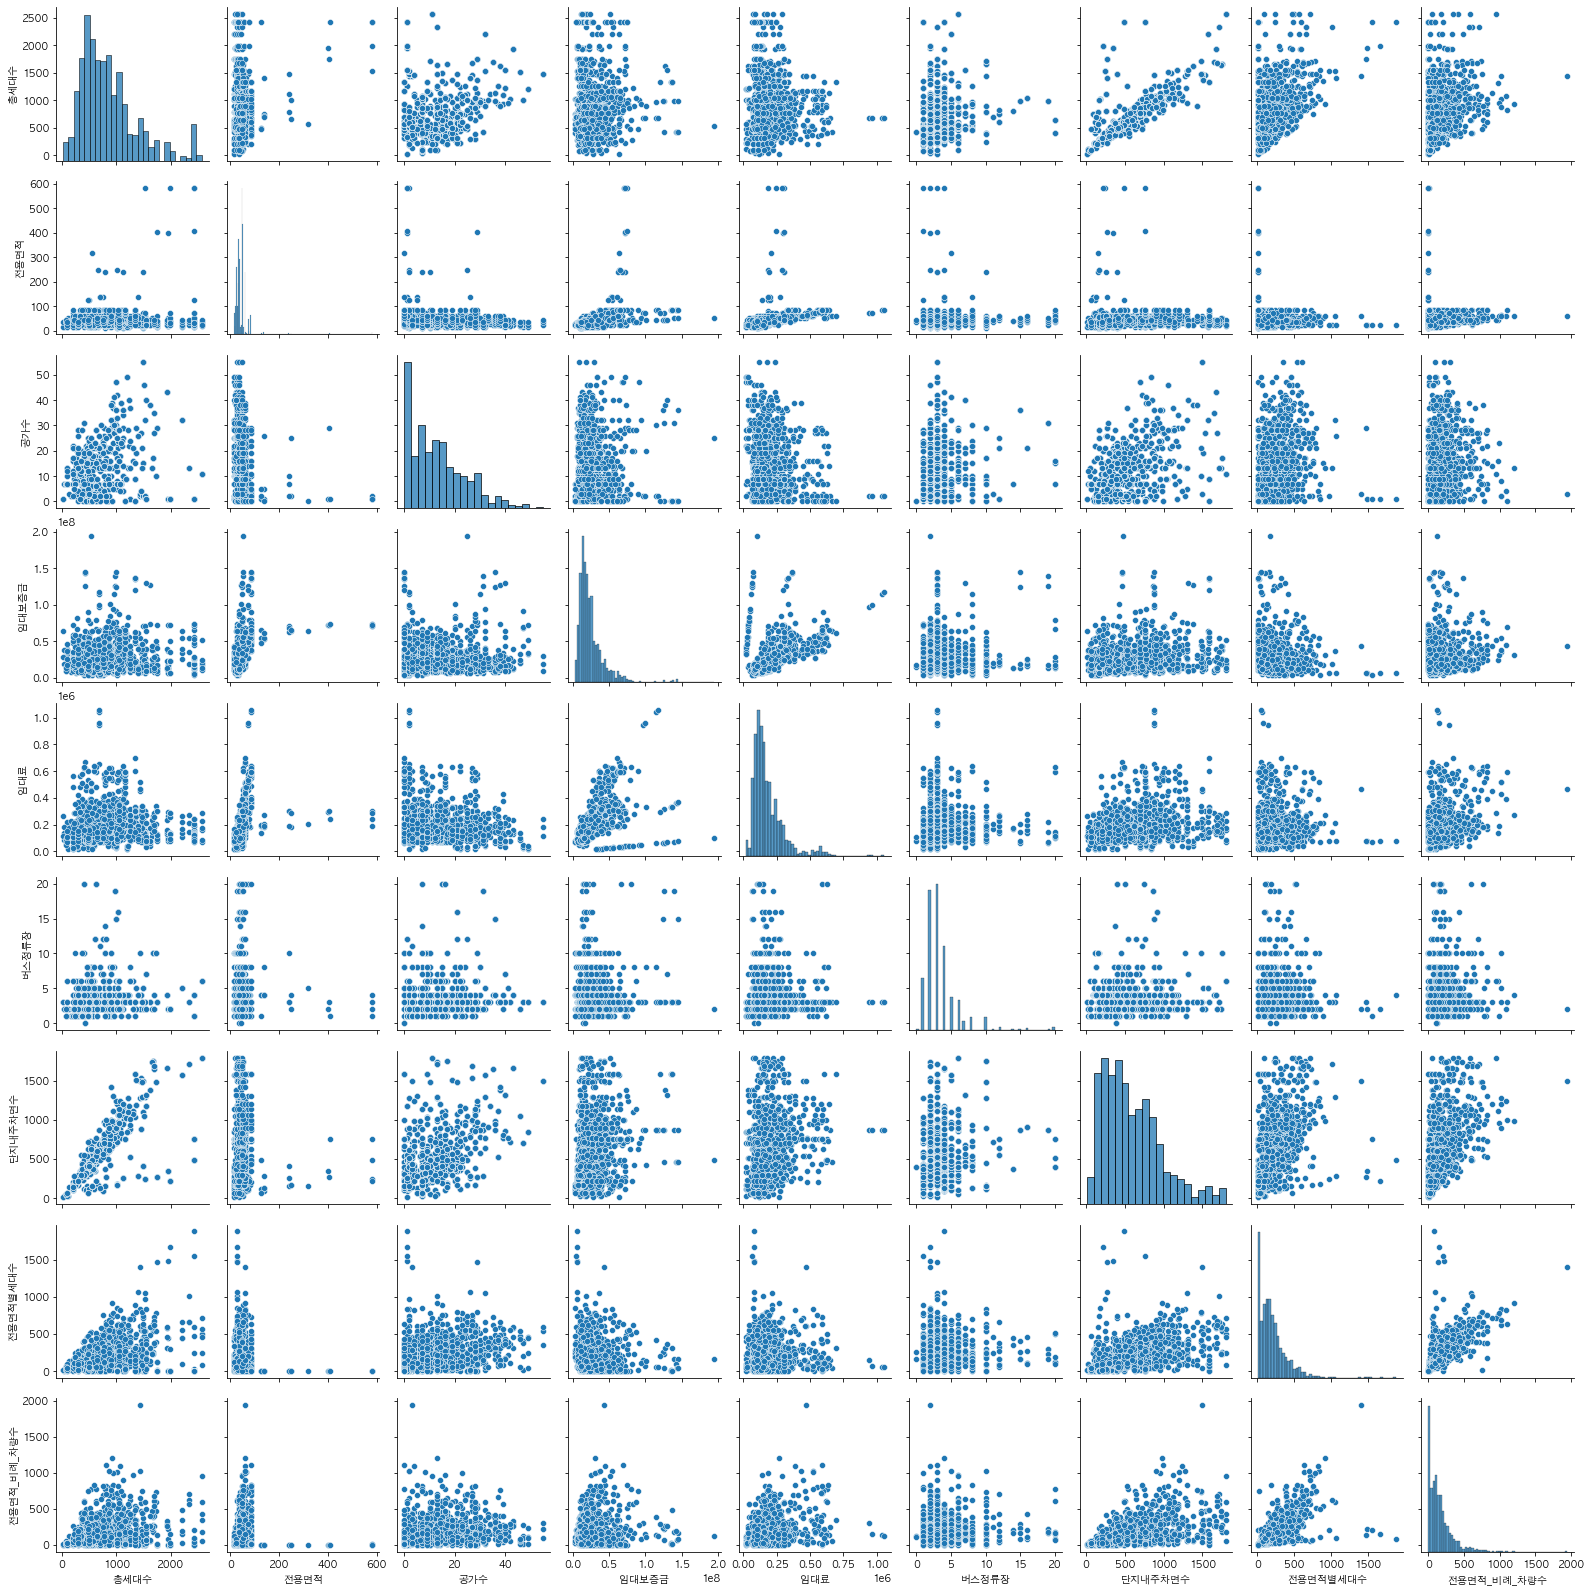

In [3]:
tmp = train[['총세대수','전용면적','공가수','임대보증금','임대료','버스정류장','단지내주차면수','전용면적별세대수','전용면적_비례_차량수']]
print(tmp.corr()[['전용면적_비례_차량수']])
sns.pairplot(tmp)

             전용면적_비례_차량수
면적_세대수_곱        0.879086
면적_세대수_곱_총합     0.321673
면적_세대수_비율       0.639403
전용면적_비례_차량수     1.000000


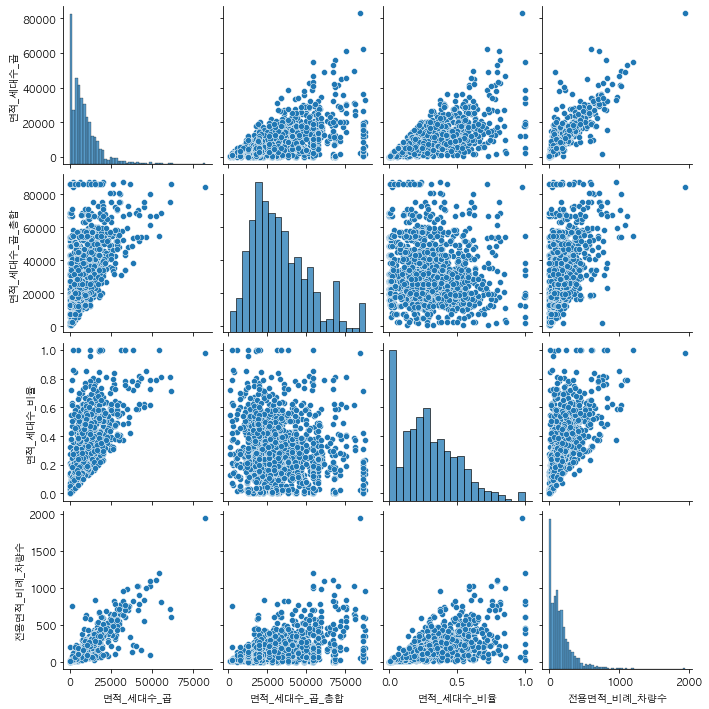

In [4]:
# train['면적_세대수_비율'] = train['면적_세대수_곱']/train['면적_세대수_곱_총합']
tmp = train[['면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율','전용면적_비례_차량수']]
print(tmp.corr()[['전용면적_비례_차량수']])
sns.pairplot(tmp)

## 범주형 피처 
- 범주형 피처 : '임대건물구분_lb', '지역_lb', '공급유형_lb', '자격유형_lb', 'ERROR1_lb'

### 결과
- '임대건물구분_lb', '공급유형_lb', '자격유형_lb', 'ERROR1_lb' (+'지역_lb')

<AxesSubplot:xlabel='임대건물구분_lb', ylabel='전용면적_비례_차량수'>

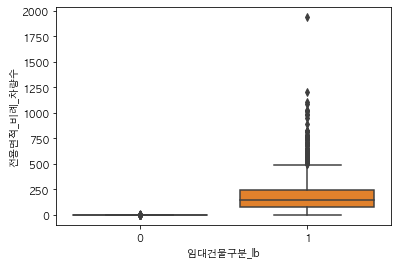

In [5]:
sns.boxplot(x='임대건물구분_lb', y='전용면적_비례_차량수', data=train)

(-5.0, 800.0)

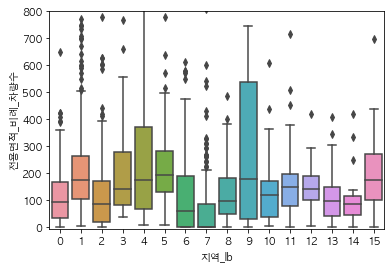

In [6]:
sns.boxplot(x='지역_lb', y='전용면적_비례_차량수', data=train)
plt.ylim(-5, 800)

<AxesSubplot:xlabel='공급유형_lb', ylabel='전용면적_비례_차량수'>

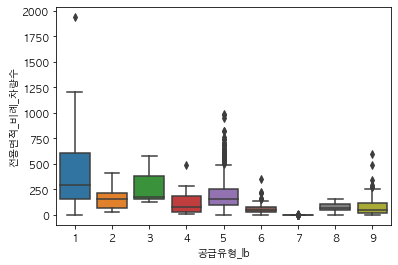

In [7]:
sns.boxplot(x='공급유형_lb', y='전용면적_비례_차량수', data=train)

이상치 처리를 해야할 수도 있겠다

(-5.0, 500.0)

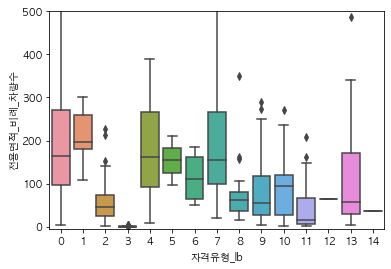

In [8]:
sns.boxplot(x='자격유형_lb', y='전용면적_비례_차량수', data=train)
plt.ylim(-5,500)

(-5.0, 750.0)

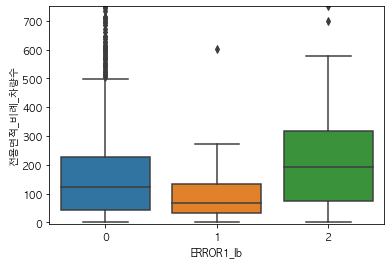

In [9]:
sns.boxplot(x='ERROR1_lb', y='전용면적_비례_차량수', data=train)
plt.ylim(-5, 750)